# **Primera Entrega - Skarlett Aparicio**
## Data Science I : Fundamentos para la Ciencia de Datos

Fecha: 14/11/2024

Comisión 61720

# **Metadata**
### **Abstract**

En el mercado editorial actual, comprender las preferencias de los lectores y las tendencias de consumo resulta fundamental para el éxito de editoriales y librerías. Este estudio se propone analizar un conjunto de datos que comprende información sobre 3641 libros disponibles en la plataforma Buscalibre con envío express a Chile. El objetivo principal es explorar las relaciones entre el costo de los libros, su popularidad y otros atributos relevantes, buscando identificar patrones que puedan optimizar las estrategias de venta de las librerías y proporcionar a las editoriales una mejor comprensión de las preferencias del público.

El dataset, obtenido mediante web scraping, incluye información detallada sobre cada libro, como título, autor, editorial, precio, descuento, formato, idioma, número de páginas, dimensiones, género, valoración, número de reseñas, estado y stock disponible. Para garantizar la calidad y consistencia de los datos, se llevará a cabo un proceso de limpieza y preprocesamiento, que incluirá el tratamiento de valores faltantes.

A través de un análisis exploratorio de datos (EDA), se pretende examinar la distribución de precios, descuentos, valoraciones y otras variables relevantes. Se buscarán patrones y tendencias en estas distribuciones que permitan caracterizar la oferta de libros en Buscalibre.

Se explorarán las relaciones entre las diferentes variables utilizando técnicas de visualización como gráficos de dispersión, box plots y heatmaps. Se estudiará la posible correlación entre el precio y el descuento, así como la influencia de la valoración en el precio de los libros. Se analizará también la relación entre el formato del libro y su precio, y se investigará la posible conexión entre la valoración y el número de reseñas.

Este estudio busca proporcionar una visión general de las tendencias de costos y popularidad de los libros en Buscalibre. Se espera identificar patrones relevantes en la distribución de precios, descuentos y valoraciones, así como en las relaciones entre diferentes variables. Los resultados de este análisis podrían ser utilizados por las librerías para optimizar sus estrategias de precios y promociones, y por las editoriales para adaptar su oferta a las demandas del mercado y comprender mejor las preferencias de los lectores. Se prevé que futuros análisis podrían incluir la segmentación de datos por género, autor o editorial para obtener insights más específicos.

Este conjunto de datos fue obtenido fue extraido de la pagina web: https://www.buscalibre.cl/libros-envio-express-chile_t.html

# **Planteamiento del Problema**

En este entorno dinámico, las librerías y editoriales se enfrentan al desafío de comprender las preferencias de los lectores, adaptarse a las nuevas tendencias y optimizar sus estrategias para alcanzar el éxito.

La plataforma Buscalibre, con su amplio catálogo y su enfoque en el envío express, se ha convertido en un actor relevante en el mercado chileno. El análisis de la información disponible sobre los libros que ofrece esta plataforma puede proporcionar valiosas perspectivas sobre las dinámicas del mercado y las preferencias de los lectores.

**Problema General:**

¿Cómo influyen el costo, la popularidad y otros atributos en la valoración y estrategias de venta de libros en la plataforma Buscalibre?

**Incógnitas Especificas:**

- ¿Qué factores determinan el precio de un libro?
- ¿Qué tipo de libros son los más populares entre los lectores?
- ¿Cómo se relacionan el precio, el descuento y la valoración de un libro con su demanda?
- ¿Qué tipo de promociones (descuentos, recomendaciones personalizadas) son más efectivas para aumentar el interés en un libro?
- ¿Existe una segmentación de mercado en función del género, autor o editorial de los libros?
- ¿Cómo se puede predecir la demanda de un libro en función de sus características?
- ¿Qué impacto tienen las reseñas y la valoración en la decisión de compra de los lectores?

**Hipótesis**

- H1: Los libros con mayor número de reseñas tienden a tener una valoración más alta.
- H2: Los libros en formato físico tienen un precio promedio mayor que los libros en formato digital.
- H3: Existe una correlación negativa entre el precio de un libro y el descuento aplicado.
- H4: Los libros de géneros populares tienen un mayor número de reseñas positivas, valoraciones altas o aparecen con mayor frecuencia en listas de deseos.
- H5: Los libros de autores reconocidos tienen un precio promedio mayor.

# Importación de las librerias a usar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm

In [ ]:
%%capture
!pip install seaborn --upgrade
!pip install matplotlib --upgrade

# Importación del dataset desde github

Se importa el dataset desde github, se estable el delimitador para que se pueda leer y por ultimo se muestra las 3 primeras filas del dataset para tener una idea del contenido

In [ ]:
github1="https://raw.githubusercontent.com/SKARLETTAPARICIO/dataset/refs/heads/main/Dataset%20Buscalibre%20envio%20express.csv"
df=pd.read_csv(github1, delimiter= ',')
df.head(3)

,Titulo,Precio,Precio Oferta,Editorial,Descuento,Formato,Autor,URL Libro,Idioma,Pagínas,...,Encuadernación,Año,Dimen Largo,Dimen Ancho,Genero,Total Reviews,Valoración,Estado,Unidades,Imagen URL
0,Juego de Mesa Saboteur,12990,11040,Fractal Juegos,0.15,ebook,Frederic Moyersoen,https://www.buscalibre.cl/libro-juego-de-mesa-...,Español,30,...,NaN,2010,NaN,NaN,Infantil,4,5.0,Libro Nuevo,8,https://images.cdn3.buscalibre.com/fit-in/360x...
1,Calendario Pared Aves de Chile 2025,10000,8500,TematicaChile,0.15,Libro Físico,TematicaChile,https://www.buscalibre.cl/libro-calendario-par...,Español,14,...,Espiral,2024,40.0,0.0,Naturaleza,0,0.0,Libro Nuevo,9,https://images.cdn2.buscalibre.com/fit-in/360x...
2,Agenda Grande Aves de Chile 2025,15000,12750,TematicaChile,0.15,Libro Físico,TematicaChile,https://www.buscalibre.cl/libro-agenda-grande-...,Español,330,...,Espiral,2024,21.0,0.0,Naturaleza,0,0.0,Libro Nuevo,4,https://images.cdn3.buscalibre.com/fit-in/360x...


### El dataset posee 3641 filas y 22 columnas

In [ ]:
df.shape

(3641, 22)

### De las 22 columnas del dataset o variables, hay 11 variables númericas de las cuales 4 es tipo float y 7 son tipo int. En cuanto a categoricas hay 11 de tipo object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3641 entries, 0 to 3640
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titulo          3641 non-null   object 
 1   Precio          3641 non-null   int64  
 2   Precio Oferta   3641 non-null   int64  
 3   Editorial       3641 non-null   object 
 4   Descuento       3641 non-null   float64
 5   Formato         3641 non-null   object 
 6   Autor           3641 non-null   object 
 7   URL Libro       3641 non-null   object 
 8   Idioma          3641 non-null   object 
 9   Pagínas         3641 non-null   int64  
 10  ISBN            3641 non-null   int64  
 11  Origen          3641 non-null   object 
 12  Encuadernación  3573 non-null   object 
 13  Año             3641 non-null   int64  
 14  Dimen Largo     2757 non-null   float64
 15  Dimen Ancho     2757 non-null   float64
 16  Genero          3641 non-null   object 
 17  Total Reviews   3641 non-null   i

## **Diccionarío de Variables**

*   Titulo: Titulo del libro en sitio web
*   Precio: Precio total sin descuento
*   Precio *Oferta*: Precio con el descuento aplicado
*   Editorial: Quienes producen o imprimen el libro
*   Descuento: Porcentaje de descuento que aplican
*   Formato: Tipo de formato de libro, si es fisico, electronico u otro
*   Autor: Quien escribio el libro
*   URL Libro: Ubicacion en la web del libro
*   Idioma: Lenguaje en la que se imprimi el libro a la venta
*   Pagínas: Cantidad de pagina del libro a la venta
*   ISBN: Codigo de registro unico de cada libro
*   Origen: Pais de donde viene el libro
*   Encuadernación: Tipo de encuadernacion en la que esta hecho el libro
*   Año: Año de impresion o publicación
*   Dimen Largo: Tamaño del libro de largo en cm
*   Dimen Ancho: Tamaño del libro de ancho en cm
*   Genero: Generos o categorias en las que se clasifica
*   Total Reviews: Total de opiniones dadas del libro
*   Valoración: Valoracion en estrellas recibidas el tope es 5
*   Estado: Condicion del libro, si en nuevo o usado
*   Unidades: Stock disponible del libro
*   Imagen URL: Ubicación de la imagen o portada del libro






In [ ]:
df.describe().round(2)

,Precio,Precio Oferta,Descuento,Pagínas,ISBN,Año,Dimen Largo,Dimen Ancho,Total Reviews,Valoración,Unidades
count,3641.00,3641.00,3641.00,3641.00,3.641000e+03,3641.00,2757.00,2757.00,3641.00,3641.00,3641.00
mean,18580.81,14255.02,0.20,298.96,9.810626e+12,2018.96,18.68,14.19,10.82,3.41,29.88
std,10684.28,8036.14,0.14,225.33,2.109086e+12,16.96,7.26,9.21,26.16,2.20,32.57
min,1180.00,0.00,0.00,2.00,6.141436e+11,1513.00,1.80,0.00,0.00,0.00,2.00
25%,12990.00,9600.00,0.15,152.00,9.788421e+12,2018.00,15.00,12.50,0.00,0.00,5.00
50%,17000.00,13600.00,0.15,256.00,9.789563e+12,2022.00,19.00,15.00,2.00,5.00,15.00
75%,21000.00,17000.00,0.15,400.00,9.789566e+12,2023.00,22.10,21.00,10.00,5.00,43.00
max,211450.00,105730.00,0.80,3792.00,9.788467e+13,2024.00,230.00,150.00,324.00,5.00,100.00


# **Manipulación de datos**

In [ ]:
# Ver la cantidad de valores nulos por columna
null_counts = df.isnull().sum()
print(null_counts)

Titulo              0
Precio              0
Precio Oferta       0
Editorial           0
Descuento           0
Formato             0
Autor               0
URL Libro           0
Idioma              0
Pagínas             0
ISBN                0
Origen              0
Encuadernación     68
Año                 0
Dimen Largo       884
Dimen Ancho       884
Genero              0
Total Reviews       0
Valoración          0
Estado              0
Unidades            0
Imagen URL          0
dtype: int64


De acuerdo al codigo anterior podemos identificar que existen 3 variables con Valores Nulos o vacios, de las cuales 1 es de tipo catégorica (Encuadernación) y 2 de tipo Numerica (Dimen Largo y Dimen Ancho)

El tratamiento que aplicaremos para la Variable catégorica sera sustituir en la Variable de (**Encuadernacion**) los valores nulos o vacios con el valor **"No especificado"**

---



In [ ]:
# Rellenar valores vacios o Nulos de la columna Encuadernación con "No Especificado"
df['Encuadernación'] = df['Encuadernación'].fillna('No Especificado')

El tratamiento que aplicaremos para los valores nulos o vacios en las variables númericas, será:

- Calcular la Media y la Moda para cada variables para asi validar cual seria la mas conveniente en usar.
- Al decidir por alguna se realizara el proceso de sustitución en dichas variables

In [ ]:
# Calcular la Media y la Moda para las columnas Dimen Largo y Dimen Ancho que tienen valores nulos o vacios para validar con cual se sustituira
# Media de Dimen Largo
mean_largo = df['Dimen Largo'].mean().round(2)
print('La Media para la columna de Dimen Largo es: ' , mean_largo)

# Media de Dimen Ancho
mean_ancho = df['Dimen Ancho'].mean().round(2)
print('La Media para la columna de Dimen Ancho es: ' , mean_ancho)

# Moda de Dimen Largo
mode_largo = df['Dimen Largo'].mode()[0].round(2)
print('La Moda para la columna de Dimen Largo es: ' , mode_largo)

# Moda de Dimen Ancho
mode_ancho = df['Dimen Ancho'].mode()[0].round(2)
print('La Moda para la columna de Dimen Ancho es: ' , mode_ancho)

La Media para la columna de Dimen Largo es:  18.68
La Media para la columna de Dimen Ancho es:  14.19
La Moda para la columna de Dimen Largo es:  15.0
La Moda para la columna de Dimen Ancho es:  0.0


De acuerdo a lo calculado se ha decidido utilizar lel valor de la media para sustituir los valores nulos o vacios en las variables (Dimen Largo y Dimen Ancho)

In [ ]:
# Rellena los valores nulos o vacios con la media redondeada en la columna o variable Dimen Largo
df['Dimen Largo'] = df['Dimen Largo'].fillna(mean_largo)
# Rellena los valores nulos o vacios con la media redondeada en la columna o variable Dimen Ancho
df['Dimen Ancho'] = df['Dimen Ancho'].fillna(mean_ancho)

In [ ]:
# Validamos que ya no hay valores nulos o vacios
null_counts = df.isnull().sum()
print(null_counts)

Titulo            0
Precio            0
Precio Oferta     0
Editorial         0
Descuento         0
Formato           0
Autor             0
URL Libro         0
Idioma            0
Pagínas           0
ISBN              0
Origen            0
Encuadernación    0
Año               0
Dimen Largo       0
Dimen Ancho       0
Genero            0
Total Reviews     0
Valoración        0
Estado            0
Unidades          0
Imagen URL        0
dtype: int64


Visualizando las columnas observamos que la de descuento esta determinada como float y el analisis indicara que el descuento sera bajo ya que no lo considera como porcentaje, ni el numero real, por ende debemos transformarla y mostrarla como como entero para que sea relevante

In [ ]:
# Multiplicamos la columna por 100 para convertir en entero el valor de la columna Descuento
df['Descuento'] = (df['Descuento'] * 100).astype(int)
df.head(3)

,Titulo,Precio,Precio Oferta,Editorial,Descuento,Formato,Autor,URL Libro,Idioma,Pagínas,...,Encuadernación,Año,Dimen Largo,Dimen Ancho,Genero,Total Reviews,Valoración,Estado,Unidades,Imagen URL
0,Juego de Mesa Saboteur,12990,11040,Fractal Juegos,15,ebook,Frederic Moyersoen,https://www.buscalibre.cl/libro-juego-de-mesa-...,Español,30,...,No Especificado,2010,18.68,14.19,Infantil,4,5.0,Libro Nuevo,8,https://images.cdn3.buscalibre.com/fit-in/360x...
1,Calendario Pared Aves de Chile 2025,10000,8500,TematicaChile,15,Libro Físico,TematicaChile,https://www.buscalibre.cl/libro-calendario-par...,Español,14,...,Espiral,2024,40.00,0.00,Naturaleza,0,0.0,Libro Nuevo,9,https://images.cdn2.buscalibre.com/fit-in/360x...
2,Agenda Grande Aves de Chile 2025,15000,12750,TematicaChile,15,Libro Físico,TematicaChile,https://www.buscalibre.cl/libro-agenda-grande-...,Español,330,...,Espiral,2024,21.00,0.00,Naturaleza,0,0.0,Libro Nuevo,4,https://images.cdn3.buscalibre.com/fit-in/360x...


# **EDA - Análisis exploratorio de los datos**

El análisis exploratorio de los datos se iniciará con el estudio del comportamiento de cada variable númerica. Para ello, se utilizarán histogramas que muestren la distribución de frecuencias y  así comprender su comportamiento, lo que permitirá identificar las variables númericas claves y seleccionar los gráficos más apropiados para su análisis posterior.

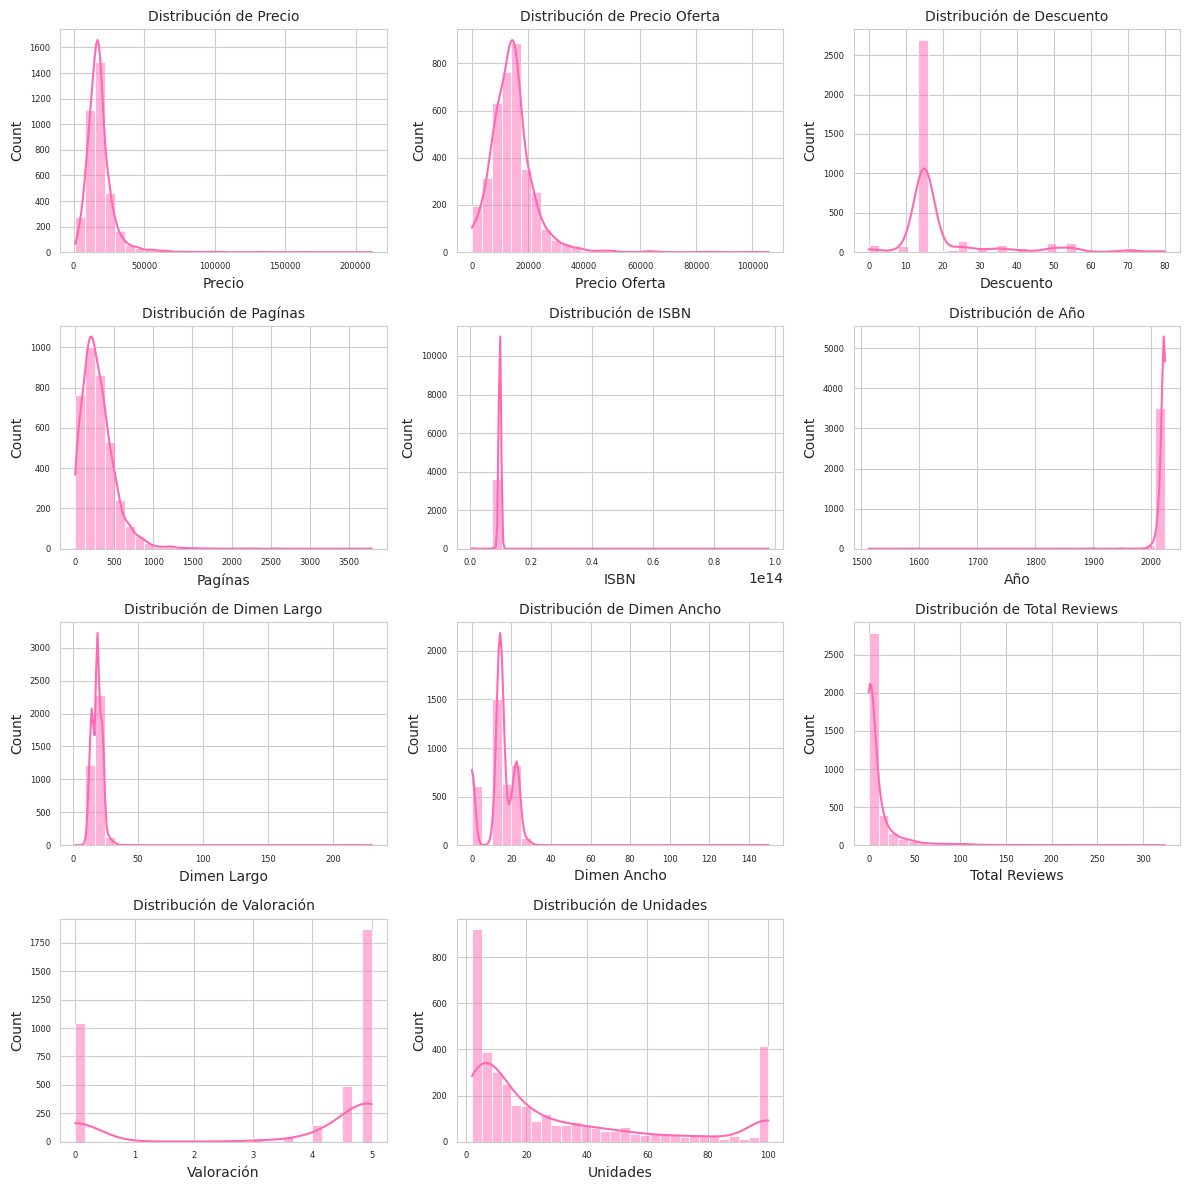

In [ ]:
# Seleccionar columnas numéricas
variablesnum = df.select_dtypes(include=['number']).columns
columnas_num = len(variablesnum)
columnas = 3
filas = (columnas_num + columnas - 1) // columnas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 3 * filas))

axes = axes.flatten() if columnas_num > 1 else [axes]

color = "#ff69b4"
color_palette = sns.light_palette("pink", as_cmap=True)

for i, feature in enumerate(variablesnum):
    sns.histplot(x=feature, data=df, kde=True, ax=axes[i], color=color, bins=30)
    axes[i].set_title(f"Distribución de {feature}", fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=6)

for i in range(columnas_num, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

De acuerdo a los histogramas generados y considerando todas las variables numéricas puedo concluir lo siguiente:

**Para las variables Precio, Precio Oferta:**

Ambos histogramas muestran una distribución con un sesgo pronunciado hacia la derecha (la mayoría de los libros tienen precios bajos, con una cola larga hacia precios más altos).
Esto indica que la mayor parte de los libros en el dataset tienen precios relativamente bajos, mientras que hay una menor cantidad de libros con precios mucho más altos.
Podría ser interesante analizar si este sesgo se debe a un tipo específico de libro (género, formato, etc.)

**Para la variable Descuento:**

El histograma del descuento también muestra un sesgo hacia la derecha con la mayoría de los descuentos siendo pequeños o moderados, y algunos descuentos muy altos que podrían indicar promociones especiales o liquidaciones. También podría tener picos en valores de descuento comunes, como 10%, 20%, etc.
Esto indica que las ofertas o promociones podrían enfocarse en un rango específico de descuentos para ser más efectivas.

**Para la variable Páginas:**

La distribución de páginas también tiene un sesgo a la derecha. La mayoría de los libros tienen entre 0 y 500 páginas, con algunos valores atípicos (libros con un número de páginas mucho mayor).
Esto es esperable, ya que la mayoría de los libros suelen tener un rango de páginas dentro de este rango.
Los libros con un número de páginas muy elevado podrían ser ediciones especiales, enciclopedias, o libros de consulta.

**Para la Variable ISBN**

Como es un código único, su histograma no revelará patrones de distribución significativos.

**Para la variable Año:**

El histograma del año de publicación muestra una concentración en los años más recientes, con una disminución gradual hacia los años anteriores.
Esto indica que la mayoría de los libros en el dataset son relativamente nuevos.
Podría ser interesante investigar si hay algún patrón entre el año de publicación y otras variables, como el precio o el género.

**Para las variables Dimen Largo, Dimen Ancho:**

Ambos histogramas muestran una distribución con un pico central y una dispersión relativamente pequeña.
Esto indica que la mayoría de los libros tienen dimensiones similares en largo y ancho, con algunas variaciones.
Estas dimensiones podrían ser representativas de los formatos de libros más comunes en el mercado.

**Para la variable Total Reviews**

El histograma de 'Total Reviews' muestra un sesgo hacia la derecha (la mayoría de los libros tienen pocas o ninguna reseña).
Estos resultados sugieren que la mayoría de los libros no tienen muchas reseñas, pero los que sí las tienen tienden a tener una buena valoración y algunos libros con un gran número de reseñas podrían ser bestsellers o títulos muy populares. Esto podría indicar que los libros con buenas valoraciones son más propensos a recibir reseñas, o que los lectores tienden a dar valoraciones positivas en general.

**Para la variable Valoración:**

El histograma de la variable "Valoración" tiene una distribución bimodal, podemos concluir que hay dos grupos distintos de libros en términos de su valoración.
Esto significa que hay dos picos o modas en la distribución, lo que indica que hay una concentración de libros con valoraciones alrededor de dos valores diferentes.
Un grupo con valoraciones altas (4 o 5 estrellas), que representa libros bien recibidos por los lectores y considerados de alta calidad.
Otro grupo con valoraciones más bajas (0 a 3 estrellas), que representa libros que no han sido tan bien recibidos y podrían tener problemas de calidad, contenido o estilo.

**Para la variable Unidades:**

El histograma de 'Unidades' muestra una concentración en valores bajos, lo que indica que la mayoría de los libros tienen un stock limitado.
Esto podría ser relevante para la gestión de inventario y la toma de decisiones sobre la reposición de stock.

En forma general, las distribuciones con sesgo hacia la derecha sugieren que la mayoría de los libros tienen características en el rango más bajo de la variable (precios bajos, pocos descuentos, pocas páginas, etc.). Esto podría ser útil para identificar las características más comunes de los libros en el mercado y para tomar decisiones sobre la estrategia de precios, marketing, o inventario

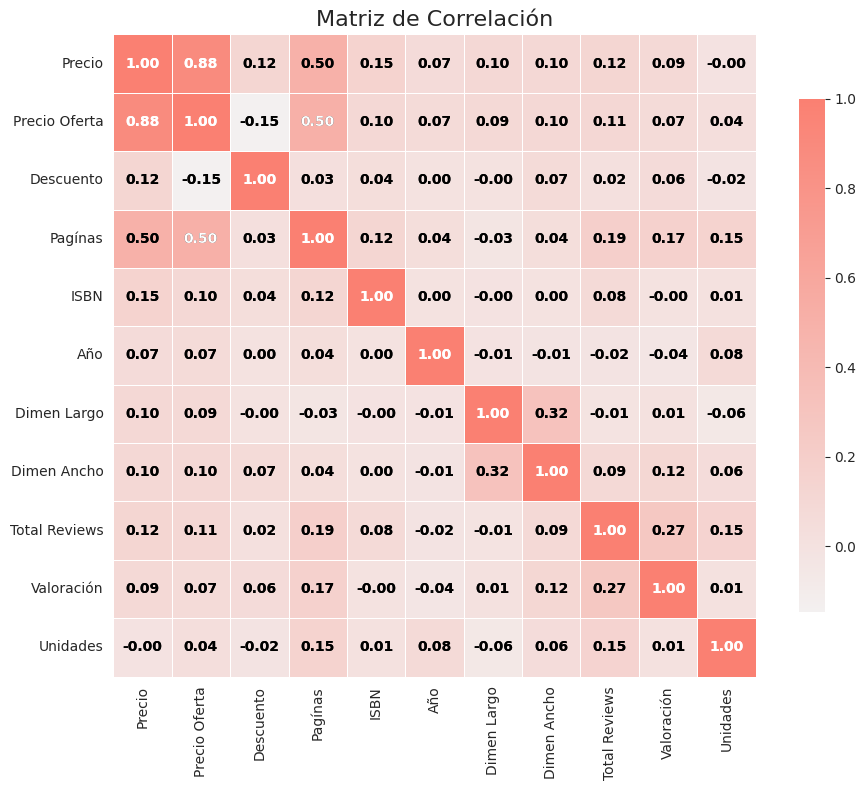

In [ ]:
# Aqui calculo la matriz de correlación solo para las variables numéricas
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

pink_palette = sns.color_palette("light:salmon", as_cmap=True)

# Función para determinar el color de la anotación
def get_annotation_color(value):
    if value > 0.5:
        return "white"  # Color blanco para valores altos (zonas oscuras)
    else:
        return "black"  # Color negro para valores bajos (zonas claras)

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=pink_palette,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10, "weight": "bold"},
    square=True,
    mask=np.zeros_like(corr_matrix, dtype=bool)
)

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        text = plt.gca().text(
            j + 0.5,
            i + 0.5,
            f'{corr_matrix.iloc[i, j]:.2f}',
            ha="center",
            va="center",
            color=get_annotation_color(abs(corr_matrix.iloc[i, j])),
            size=10,
            weight="bold"
        )

plt.title("Matriz de Correlación", fontsize=16)
plt.tight_layout()
plt.show()

De acuerdo con el grafico podemos concluir que:
- El precio del producto está principalmente influenciado por sus dimensiones, especialmente por la dimensión larga.
- La dimensión larga y la dimensión ancha están relacionadas entre sí.
- Las demás variables numéricas no parecen tener una influencia significativa en el precio del producto.

# **Gráficos Univariables**

### **Vizualizacion de la distribución de precios en el dataset.**

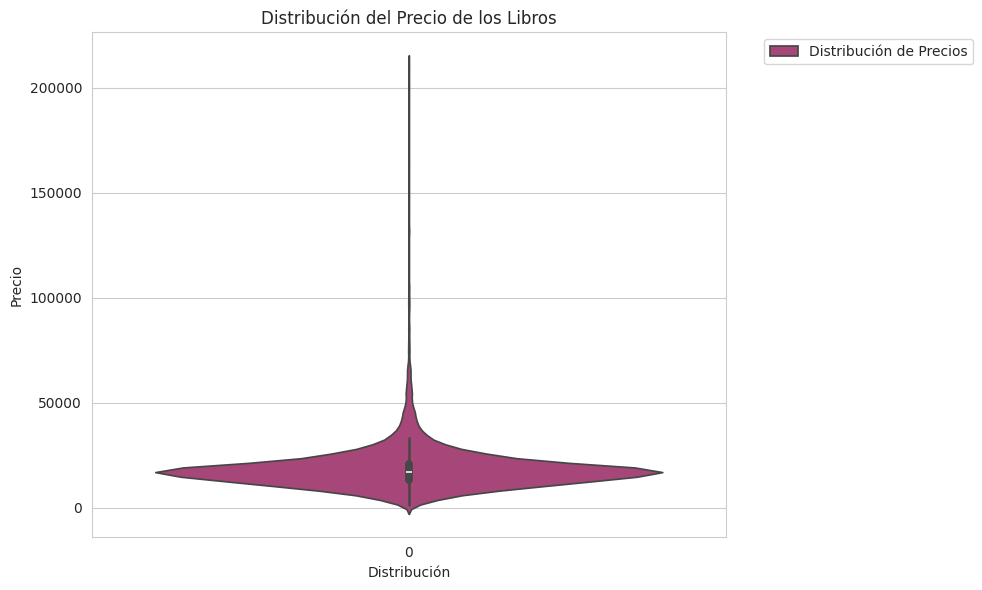

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='Precio', x=[0] * len(df), data=df, palette='magma', hue= [0] * len(df), legend=False, label='Distribución de Precios')
plt.title('Distribución del Precio de los Libros')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Distribución')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()

La distribución del precio en el gráfico de violín muestra que la mayoría de los libros en Buscalibre se encuentran en rangos de precios bajos, mientras que una minoría se destaca por precios significativamente altos, lo que indica la posible presencia de ediciones especiales o libros con características únicas. Esta tendencia responde a la incógnita sobre **qué factores determinan el precio de un libro**, ya que sugiere que ciertos atributos, como el formato, el género o la editorial, podrían influir en el precio. Además, esta concentración de precios bajos plantea una posible relación entre precios accesibles y estrategias de descuento menos agresivas, lo que nos lleva a explorar la hipótesis de que existe una correlación negativa entre precio y descuento.

### **Cantidad de libros por cada formato (físico o digital)**

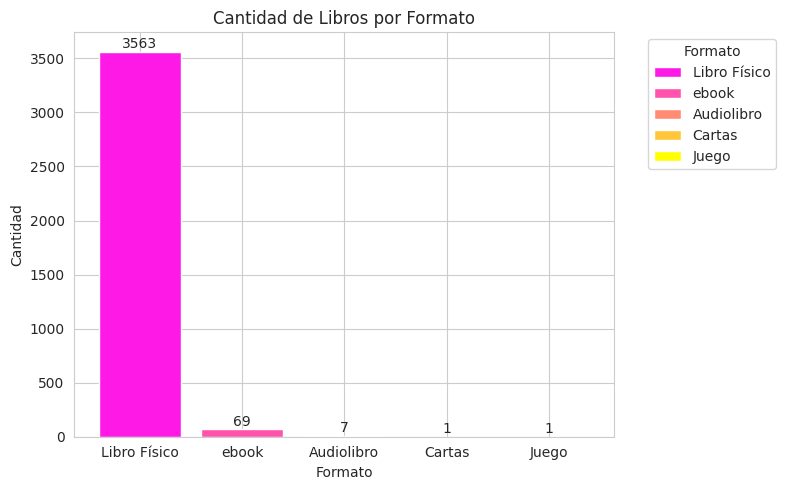

In [ ]:
formats = df['Formato'].value_counts().index
counts = df['Formato'].value_counts().values

fig, ax = plt.subplots(figsize=(8, 5))

color_values = np.linspace(0.1, 1, len(formats))
bars = ax.bar(formats, counts, color=plt.cm.spring(color_values))
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
            count, ha='center', va='bottom')

ax.legend(bars, formats, title="Formato", bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title('Cantidad de Libros por Formato')
ax.set_xlabel('Formato')
ax.set_ylabel('Cantidad')

plt.tight_layout()

plt.show()

La gráfica de barras muestra que el formato físico domina ampliamente la oferta de libros en Buscalibre, con 3563 ejemplares, mientras que los formatos digitales (ebooks, audiolibros) y otros productos (juegos, cartas) tienen una presencia mínima. Esto responde a la incógnita sobre qué tipo de libros son los más populares entre los lectores, indicando que los libros en formato físico son la principal oferta y, posiblemente, la principal demanda en esta plataforma. La marcada diferencia en la cantidad sugiere que los libros físicos son preferidos tanto por los consumidores como por los vendedores, lo cual podría influir en el precio y las estrategias de venta, apoyando la hipótesis H2, que plantea que los libros en formato físico tienen un precio promedio mayor que los digitales.

### **Variabilidad en los descuentos ofrecidos**

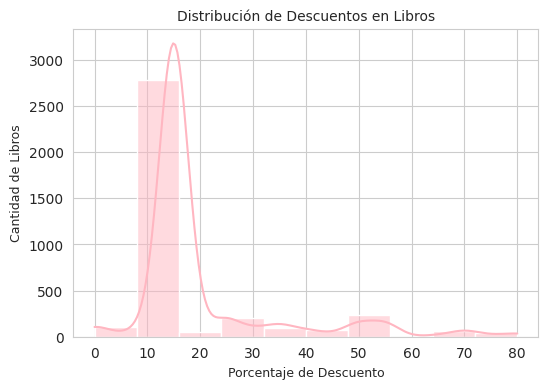

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Descuento', bins=10, color='lightpink', kde=True)

plt.title('Distribución de Descuentos en Libros', fontsize=10)
plt.xlabel('Porcentaje de Descuento', fontsize=9)
plt.ylabel('Cantidad de Libros', fontsize=9)

plt.show()

El gráfico muestra que la mayoría de los descuentos en libros se concentran en un rango específico, alrededor del 10-20%. Esto sugiere que las editoriales suelen aplicar descuentos moderados para estimular las ventas sin devaluar demasiado el producto.
El gráfico apoya la idea de que a mayor precio, menor descuento, ya que la mayoría de los descuentos se concentran en un rango bajo.
En resumen, el gráfico nos ayuda a entender que las estrategias de precios en la industria editorial están relacionadas con factores como el costo del libro, su popularidad y la necesidad de incentivar las ventas. Los descuentos moderados son una herramienta común para lograr este objetivo.
El gráfico nos ofrece una primera mirada a cómo se fijan los precios de los libros y cómo los descuentos influyen en las ventas.

### **Total de libros por Genero y Top 15 de Generos con mas libros**

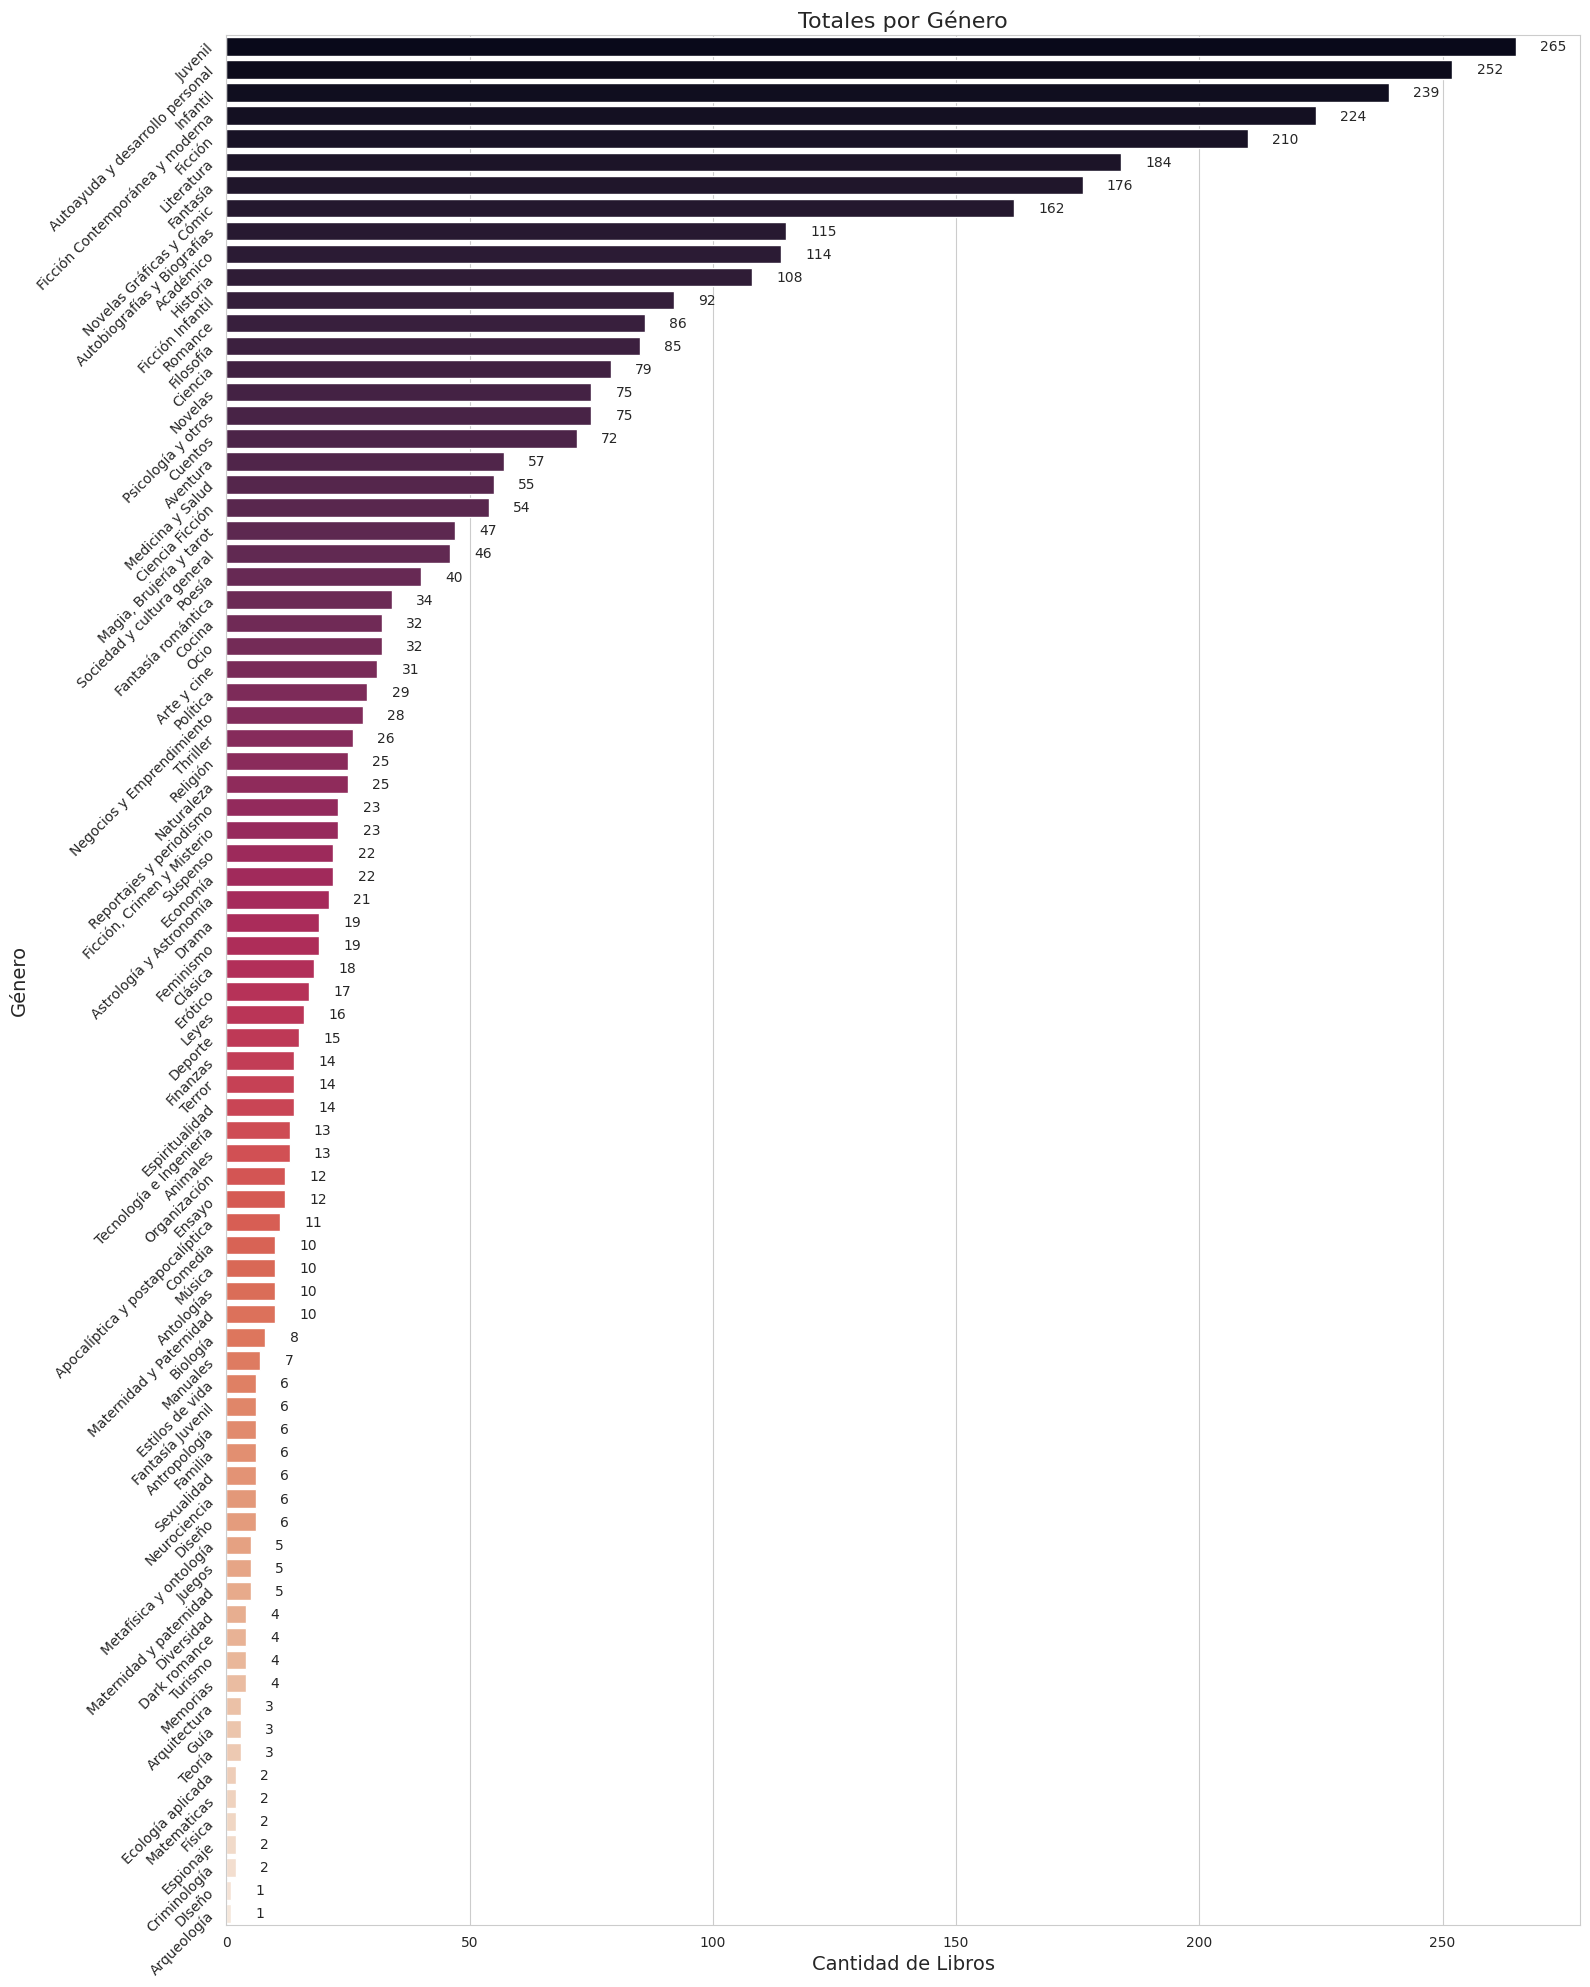

In [ ]:
genero_counts = df['Genero'].value_counts()


custom_palette = sns.color_palette("rocket", n_colors=len(genero_counts))

plt.figure(figsize=(16, 20))

ax = sns.barplot(x=genero_counts.values, y=genero_counts.index,
                 hue=genero_counts.index, palette=custom_palette, legend=False)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="left", va="center")

plt.yticks(rotation=45, ha='right', fontsize=10)

plt.title('Totales por Género', fontsize=16)
plt.xlabel('Cantidad de Libros', fontsize=14)
plt.ylabel('Género', fontsize=14)

plt.subplots_adjust(left=0.3)

plt.tight_layout()

plt.show()

En vista que son gran cantidad de Generos, realizaremos un filtro para mostrar los 15 mas recurrentes ya que seran los generos que producen mas los autores y editoriales

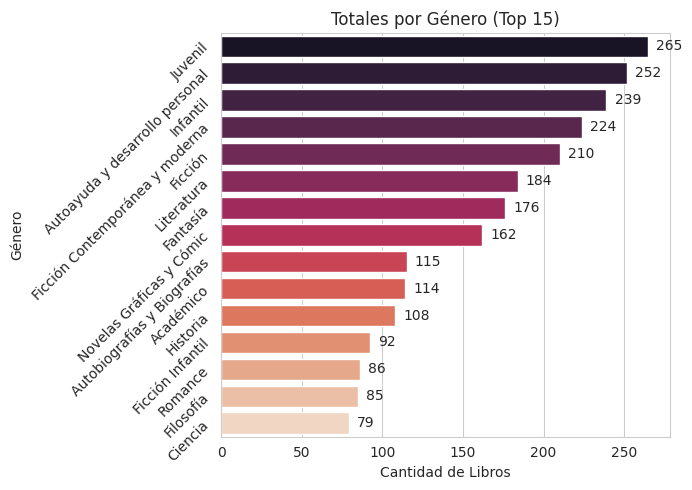

In [ ]:
# Obtener los totales de cada género
genero_counts = df['Genero'].value_counts()

# Mostrar solo los 15 géneros más frecuentes
top_generos = genero_counts.nlargest(15)

custom_palette = sns.color_palette("rocket", n_colors=len(top_generos))

plt.figure(figsize=(7, 5))

ax = sns.barplot(x=top_generos.values, y=top_generos.index,
                 hue=top_generos.index, palette=custom_palette, legend=False)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="left", va="center")

plt.yticks(rotation=45, ha='right')

plt.title('Totales por Género (Top 15)')
plt.xlabel('Cantidad de Libros')
plt.ylabel('Género')

plt.tight_layout()

plt.show()

El gráfico nos muestra la cantidad de libros disponibles por género en un top 15, sin embargo es importante aclarar que no responde directamente a la incognita ¿Qué tipo de libros son los más populares entre los lectores?  Si bien podemos inferir que una mayor cantidad de libros en un género particular podría indicar una mayor oferta para satisfacer una demanda potencial, no podemos afirmar con certeza que esos sean los géneros más demandados sin datos adicionales como ventas, reseñas o métricas de interacción del usuario.
Sin embargo el grafico nos muestra que los generos que las editoriales y que la tienda tiende a poner a la venta en mayor cantidad son los juveniles, de autoayuda, infantiles y de ficción.

# **Gráficos Bivariables**

### **Relación entre Precio y Descuento**

Continuando con el analisis exploratorio realizare relaciones entre variables que considero importante para el data set

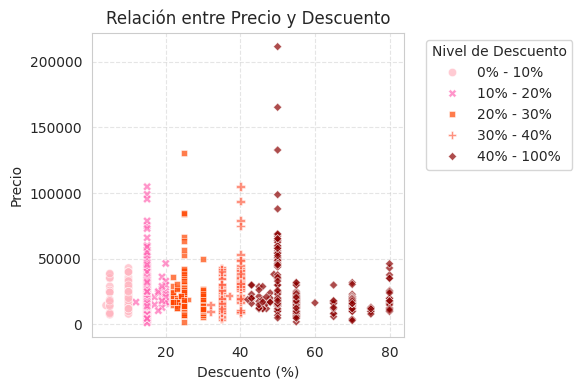

In [ ]:
df['Descuento_categoria'] = pd.cut(
    df['Descuento'],
    bins=[0, 10, 20, 30, 40, 100],
    labels=['0% - 10%', '10% - 20%', '20% - 30%', '30% - 40%', '40% - 100%']
)
palette = ["#ffb6c1", "#ff69b4", "#ff4500", "#ff6347", "#8b0000"]

plt.figure(figsize=(6, 4))

sns.scatterplot(
    x='Descuento',
    y='Precio',
    data=df,
    hue='Descuento_categoria',
    palette=palette,
    alpha=0.7,                  # Transparencia
    style='Descuento_categoria',
)

plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Relación entre Precio y Descuento')
plt.xlabel('Descuento (%)')
plt.ylabel('Precio')
plt.legend(title='Nivel de Descuento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

El gráfico **"Relación entre Precio y Descuento"** en Buscalibre revela una tendencia donde la mayoría de los libros tienen precios y descuentos bajos. Sin embargo, a medida que el precio aumenta, la variabilidad en los descuentos también lo hace, con algunos libros de precios altos presentando descuentos significativos mientras que otros tienen descuentos mínimos. Esta observación **apoya parcialmente la hipótesis H3**, que plantea una correlación negativa entre precio y descuento.

Sin embargo, la dispersión de los puntos y la formación de grupos según el tipo de edición (ediciones especiales, libros de bolsillo, etc.) sugieren que el descuento no es el único factor que determina el precio. La categoría del libro y la popularidad del autor también podrían influir, lo cual se relaciona con la incógnita sobre los factores que determinan el precio de un libro.

La menor densidad de puntos en la zona de precios altos con descuentos significativos podría indicar que los libros con mayor valoración tienden a tener precios más altos y descuentos menores. Esta observación se vincula con la incógnita sobre la relación entre precio, descuento, valoración y demanda. Se necesitan análisis adicionales que incluyan la valoración y la demanda para confirmar estas relaciones y comprender completamente cómo estos factores influyen en las ventas.

En resumen, el gráfico muestra una relación compleja entre precio y descuento en Buscalibre, donde la demanda podría verse afectada por ambos, así como por el tipo de edición, la categoría del libro y la valoración.

### **Gráfico Precio por Género**



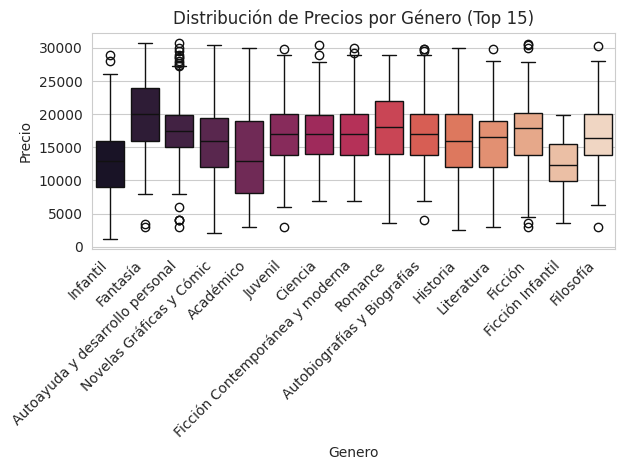

In [ ]:
# Calculo de los límites para identificar valores atípicos
Q1 = df_filtered['Precio'].quantile(0.25)
Q3 = df_filtered['Precio'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Máscara para identificar valores atípicos
outliers_mask = (df_filtered['Precio'] < lower_bound) | (df_filtered['Precio'] > upper_bound)

# 5 valores atípicos más cercanos al centro
closest_outliers_indices = df_filtered.loc[outliers_mask, 'Precio'].sort_values().head(5).index

df_filtered_clipped = df_filtered.copy()
df_filtered_clipped.loc[outliers_mask & ~df_filtered_clipped.index.isin(closest_outliers_indices), 'Precio'] = np.nan
sns.boxplot(x='Genero', y='Precio', data=df_filtered_clipped, hue='Genero', palette='rocket', dodge=False, showfliers=True)
plt.legend([],[], frameon=False)
plt.title('Distribución de Precios por Género (Top 15)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gráfico de caja muestra de manera clara que existen diferencias significativas en los precios promedio entre los diferentes géneros literarios. Podemos observar que géneros como "Autoayuda y desarrollo personal" y "Novelas gráficas y cómic" tienden a tener precios promedio más bajos, mientras que géneros como "Romance" y "Fantasia" presentan precios promedio más altos.

Este gráfico nos ayuda a responder a la pregunta: ¿Qué factores determinan el precio de un libro? Claramente, el género es un factor que influye significativamente en el precio. Además, podemos inferir que factores como la demanda, la producción y la distribución podrían estar influyendo en estas diferencias de precios entre géneros.

Aunque el gráfico no nos permite confirmar o refutar directamente las demás hipótesis, nos proporciona una base sólida para realizar análisis adicionales. Por ejemplo, podríamos explorar si existe una correlación entre el precio y el número de páginas, o si los libros de autores reconocidos tienen precios más altos en promedio.

### **Gráfico Proporción de formatos por el top 15 género con mas libros**

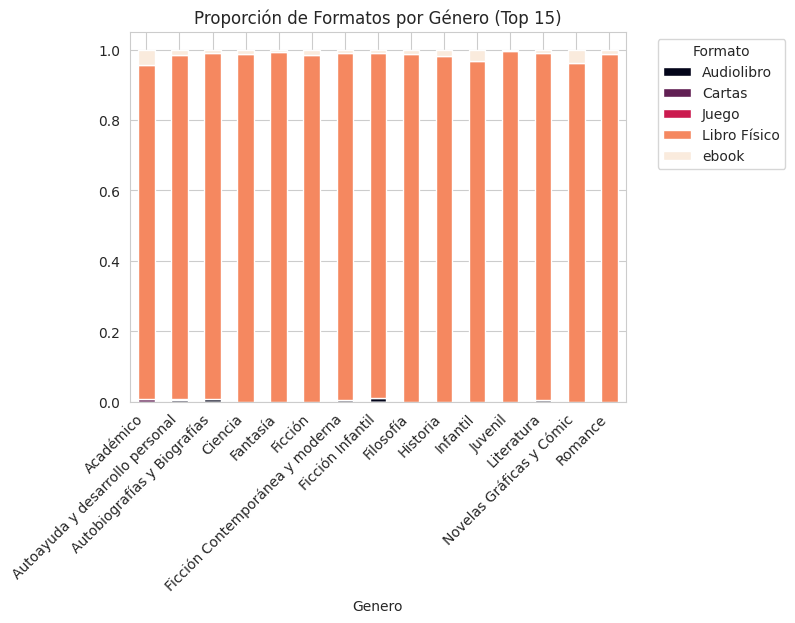

In [ ]:
# Obtener los 15 géneros con más libros
top_15_generos = df['Genero'].value_counts().nlargest(15).index

# Filtrar el DataFrame original para incluir solo los géneros del top 15
df_filtered = df[df['Genero'].isin(top_15_generos)]

df_grouped = df_filtered.groupby(['Genero', 'Formato']).size().unstack().fillna(0)

df_grouped.div(df_grouped.sum(axis=1), axis=0).plot(kind='bar', stacked=True, colormap='rocket')

plt.title('Proporción de Formatos por Género (Top 15)')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Formato')
plt.show()

El gráfico de barras apiladas nos muestra la proporción de diferentes formatos de libros (audiolibro, cartas, juego, libro físico y ebook) dentro de cada género literario. Lo más destacado es que el formato físico es el más predominante en casi todos los géneros. Esto sugiere que a pesar del crecimiento de los formatos digitales, el libro físico sigue siendo la opción preferida por la mayoría de los lectores.
Se puede ver tambien que aunque el formato físico es dominante en general, podemos observar algunas variaciones entre géneros. Por ejemplo, en el género de "Ficción Contemporánea y Moderna" y "Literatura" existe una mayor proporción de ebooks en comparación con otros géneros.

En relacion a las incognitas este gráfico nos ayuda a responder a la pregunta, ¿Qué tipo de libros son los más populares entre los lectores? Al mostrar la preferencia por el formato físico en ventas y produccion por parte de la tienda y las editoriales en la mayoría de los géneros, podemos inferir que los lectores aún prefieren la experiencia de leer un libro físico.

Además, este gráfico nos proporciona información relevante para analizar la segmentación del mercado en función del formato. Podemos observar que existen diferencias en la preferencia de formatos entre los diferentes géneros literarios, lo que sugiere que los lectores de cada género tienen necesidades y preferencias distintas y que la tienda esta encaminada ofreciendo los formatos mas relevantes y explorando diferentes nichos en cuanto a formatos se refiere.

### **Relación entre Valoración y Total Reviews**

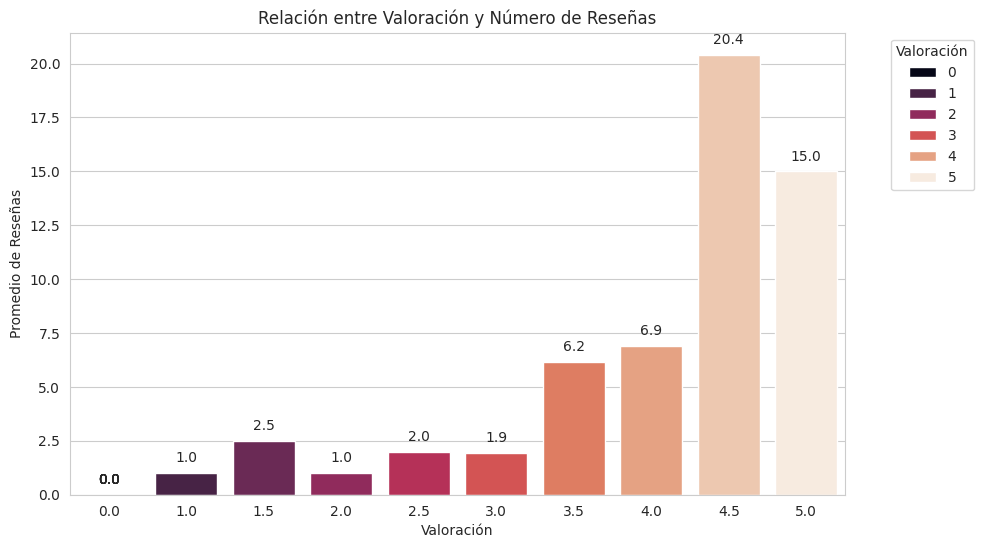

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Valoración', y='Total Reviews', data=df, estimator=np.mean, errorbar=None, hue='Valoración', palette="rocket", dodge=False)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc="upper left", title="Valoración")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}'.format(height), ha="center")
plt.title('Relación entre Valoración y Número de Reseñas')
plt.xlabel('Valoración')
plt.ylabel('Promedio de Reseñas')
plt.show()

Este gráfico de barras muestra la relación entre la valoración promedio de un libro y el número promedio de reseñas que recibe. Cada barra representa una valoración específica (de 1 a 5 estrellas), y la altura de la barra indica el número promedio de reseñas que reciben los libros con esa valoración.
Observando a detalle podemos inferir que los libros con las valoraciones más altas (4 y 5 estrellas) son los que reciben, por mucho, el mayor número de reseñas. Esto sugiere que los lectores están más dispuestos a dejar una reseña cuando han tenido una experiencia positiva con un libro.
Este gráfico confirma la hipótesis H1: "Los libros con mayor número de reseñas tienden a tener una valoración más alta". La fuerte correlación positiva entre ambas variables sugiere que existe una relación causal, es decir, que los libros con valoraciones más altas atraen un mayor número de reseñas.
Es importante mencionar que este gráfico nos proporciona una visión clara de la relación entre la valoración y el número de reseñas, y confirma la importancia de las reseñas en la percepción de los lectores sobre un libro.

**Relación entre Precio y Formato**

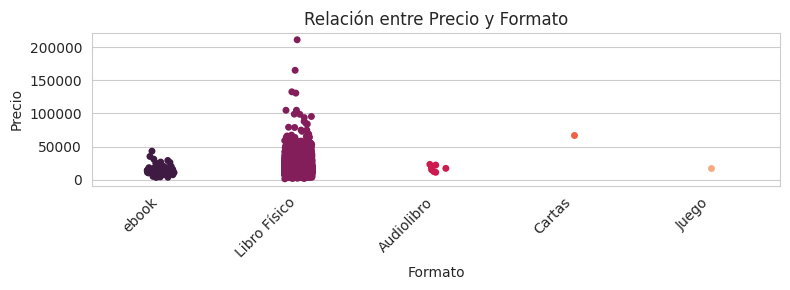

In [ ]:
# Relación entre Precio y Formato
plt.figure(figsize=(8, 3))
ax = sns.stripplot(x='Formato', y='Precio', data=df, palette="rocket", jitter=True, hue='Formato', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title('Relación entre Precio y Formato')
plt.xlabel('Formato')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()

Este gráfico de dispersión nos muestra la relación entre el precio y el formato de los libros. Cada punto representa un libro, donde la posición en el eje horizontal indica su formato (ebook, libro físico, audiolibro, cartas o juego) y la posición en el eje vertical indica su precio.
La mayoría de los ebooks se concentran en la parte inferior del gráfico, lo que indica que, en general, los ebooks tienen precios más bajos en comparación con otros formatos.
Los libros físicos muestran una mayor dispersión en los precios, lo que sugiere que hay una mayor variedad de precios dentro de este formato. Podemos encontrar desde libros físicos muy económicos hasta otros con precios considerablemente más altos.
Este gráfico podría ayudar a confirmar o refutar hipótesis relacionadas con el precio y el formato de los libros. Por ejemplo:
- Los libros en formato físico tienen un precio promedio mayor que los libros en formato digital: Este gráfico parece respaldar esta hipótesis, ya que la mayoría de los puntos correspondientes a los libros físicos se encuentran en una posición más alta en el eje de precios.
- Existe una correlación negativa entre el precio de un libro y el descuento aplicado: Aunque este gráfico no muestra directamente los descuentos, podemos inferir que los libros con precios más altos podrían tener menos descuentos.

# **Gráficos Multivariables**



### **Gráfico Precio vs. Valoración**





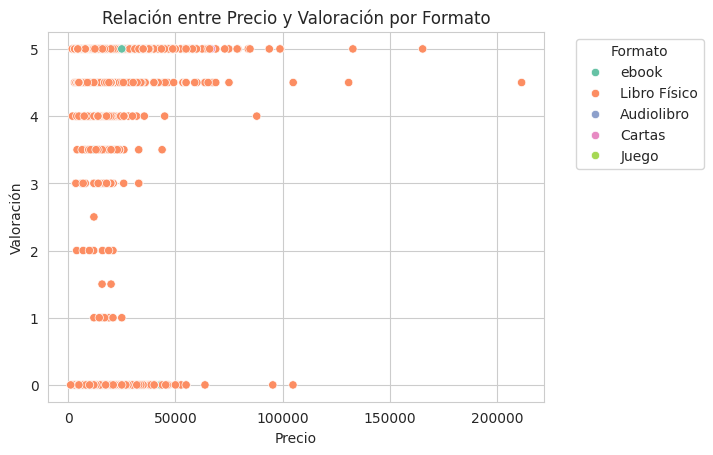

In [ ]:
# Creamos el gráfico de dispersión
sns.scatterplot(data=df, x='Precio', y='Valoración', hue='Formato', palette='Set2')
plt.legend(title='Formato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Relación entre Precio y Valoración por Formato')
plt.grid(True)
plt.show()

Este gráfico de dispersión nos muestra la relación entre el precio de un libro y su valoración, desglosada por formato. Cada punto representa un libro, donde la posición en el eje horizontal indica su precio y la posición en el eje vertical indica su valoración. El color de cada punto representa el formato del libro.
Al observar el gráfico, notamos que los puntos están dispersos en todo el rango de precios, sin una clara tendencia ascendente o descendente. Esto sugiere que el precio de un libro no es un predictor confiable de su valoración. Es decir, un libro caro no necesariamente tiene una valoración alta, y viceversa.
Este gráfico podría ayudar a refutar la hipótesis de que existe una correlación positiva entre el precio y la valoración de un libro. Sin embargo, es importante recordar que la correlación no implica causalidad, y que otros factores podrían estar influyendo en esta relación.
En resumen, este gráfico nos muestra que la relación entre precio y valoración es más compleja de lo que podría parecer a simple vista. Otros factores, además del precio, juegan un papel importante en la percepción de los lectores sobre un libro.

### **Promedio de precio por Año y por formato**


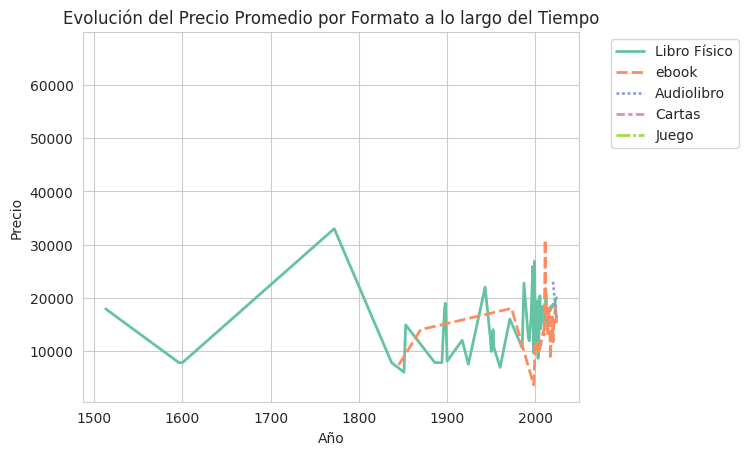

In [ ]:
df_year = df.groupby(['Año', 'Formato'])['Precio'].mean().reset_index()
sns.lineplot(x='Año', y='Precio', hue='Formato', data=df_year, palette='Set2',
                style='Formato',
                dashes=True,  # Esto agregará líneas discontinuas
                linewidth=2)  # Esto ajustará el grosor de las líneas
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Evolución del Precio Promedio por Formato a lo largo del Tiempo')
plt.show()

Este gráfico de líneas nos muestra cómo ha evolucionado el precio promedio de diferentes formatos de libros a lo largo del tiempo, desde el año 1500 hasta el año 2000.
A lo largo de toda la historia representada, el libro físico ha sido el formato más caro. Sin embargo, su precio ha experimentado fluctuaciones significativas, con un pico alrededor de 1800 y una tendencia a la baja en los últimos siglos.
En resumen, este gráfico nos ofrece una visión general de cómo los precios de los libros han evolucionado a lo largo del tiempo y cómo la aparición de nuevos formatos ha impactado el mercado.

### **Comparación de Precios entre Autores Reconocidos y No Reconocidos**

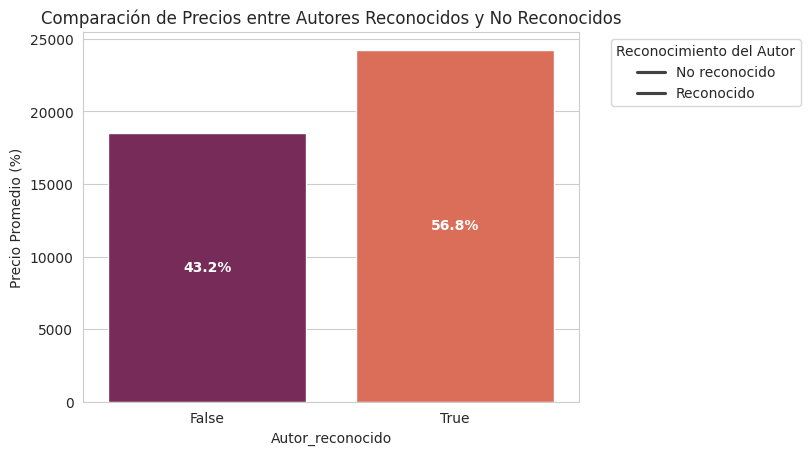

In [ ]:
# Calcula el precio promedio para cada grupo de autores
precio_promedio = df.groupby('Autor_reconocido')['Precio'].mean().reset_index()
umbral_reconocimiento = 100
df['Autor_reconocido'] = df['Total Reviews'] > umbral_reconocimiento
ax = sns.barplot(x='Autor_reconocido', y='Precio', data=precio_promedio, palette='rocket', hue='Autor_reconocido')
total = precio_promedio['Precio'].sum()
valores = precio_promedio['Precio'] / total * 100

plt.legend(title='Reconocimiento del Autor', labels=['No reconocido', 'Reconocido'], bbox_to_anchor=(1.05, 1), loc='upper left')

for i, p in enumerate(ax.patches):
    if i < len(valores):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height / 2,
                '{:.1f}%'.format(valores[i]), ha="center", va="center", color='white', weight='bold')

plt.title('Comparación de Precios entre Autores Reconocidos y No Reconocidos')
plt.ylabel('Precio Promedio (%)')
plt.show()

Este gráfico de barras compara el precio promedio de los libros escritos por autores considerados "reconocidos" con aquellos escritos por autores menos conocidos.
Lo más evidente es que los libros escritos por autores reconocidos tienen, en promedio, un precio significativamente más alto que los libros escritos por autores menos conocidos. Esto sugiere que el reconocimiento del autor es un factor que influye directamente en el precio de un libro.
El reconocimiento de un autor se traduce en un valor de marca que permite a las editoriales fijar precios más altos. Los lectores están dispuestos a pagar más por los libros de autores reconocidos, ya que confían en la calidad y el prestigio de su obra.
De forma resumida podemos decir que:
Este gráfico nos ayuda a responder preguntas como:
¿Influye el reconocimiento del autor en el precio de un libro? La respuesta, según el gráfico, es un rotundo sí. Los autores reconocidos tienen un mayor poder de mercado y pueden fijar precios más altos.
¿Existe una relación directa entre el precio de un libro y su calidad percibida? Si asumimos que los autores reconocidos son percibidos como de mayor calidad, este gráfico sugiere una correlación positiva entre precio y calidad percibida.